In [37]:
from sklearn.cluster import KMeans 
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt
import mglearn

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter('ignore')

import matplotlib
matplotlib.rcParams["font.family"]="AppleGothic"
matplotlib.rcParams["axes.unicode_minus"]= False

In [4]:
# 라이브러리에서 test할 목적으로 데이터를 만들어줌
X,y = mglearn.datasets.make_forge()

x_train, x_test, y_train, y_test = train_test_split( X,y, 
                        test_size=0.2) #defalult 75% 25%  ,7:3

In [30]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [31]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

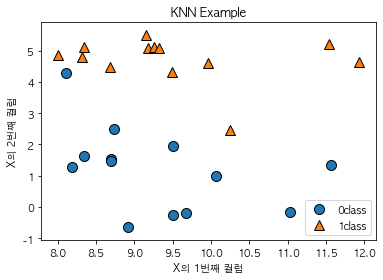

In [43]:
mglearn.discrete_scatter( X[:,0],X[:,1],y)
plt.legend( ['0class','1class'])
plt.title('KNN Example')  # 인접 이웃을 통해 분류
plt.xlabel('X의 1번째 컬럼') 
plt.ylabel('X의 2번째 컬럼')
plt.show()

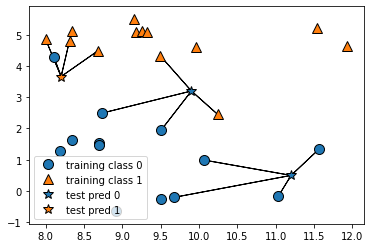

In [21]:
# 별표는 새로운 데이터
# 가장 인접하는 이웃으로 새로운 데이터를 분류 
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [22]:
# Gridsearch를 통해 n_neighbors 값을 확인해봐야함
model_knn = KNeighborsClassifier(n_neighbors=1)
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
model_knn.predict(x_test)
y_test

array([0, 0, 1, 0, 1, 1])

In [36]:
model_knn.score(x_test, y_test)

1.0

### GridSearchCV 사용

In [40]:
param = {'n_neighbors':[1,2,3,4,5]}

# 교차 검증도 해줌
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = param)
gridSearch.fit(x_train, y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5]})

In [41]:
gridSearch.best_params_

{'n_neighbors': 3}

In [42]:
gridSearch.best_score_

0.9

## 연습문제 iris 데이터 셋을 KNN을 이용하여 분류하시오

### 데이터 가져오기

In [45]:
from sklearn.datasets import load_iris

In [46]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [47]:
iris_df = pd.DataFrame( iris.data)
iris_df.columns = iris['feature_names']
iris_df['specis'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specis
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
x_data = iris_df.iloc[:,:-1]
y_data = iris_df.iloc[:,-1]

print(x_data.shape, y_data.shape)

(150, 4) (150,)


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
        test_size=0.2, stratify=y_data)

In [68]:
param = {'n_neighbors':[i for i in range(0,15)]}

# 교차 검증도 해줌
# scoring='r2' 회귀분석에서 사용
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid = param, cv=10, scoring='r2')
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                         12, 13, 14]},
             scoring='r2')

In [69]:
# 최적의 파라미터 선정
gridSearch.best_params_

{'n_neighbors': 6}

In [73]:
# 좋은 estimator로 교차 검증된 점수를 보여줌
gridSearch.best_score_

0.9375

In [67]:
# gridSearch.best_estimator_ 최적의 파라미터로 모델생성
gridSearch.best_estimator_.predict( x_test )

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2])

### 데이터 검증

In [60]:
gridSearch.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2])

In [62]:
np.array(y_test)

array([2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 0, 2, 0, 2, 2])